# Visualization

In [63]:
import geopandas as gpd
import mapclassify
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [64]:
# Load data
gdf = gpd.read_file('./va_admin_bndry/VirginiaCounty_ClippedToShoreline.shx')
mdf = pd.read_csv('properly_merged_data.csv')

In [65]:
# Merge shapefile data and county adjacency data:
gdf['FIPS_left'] = pd.to_numeric(gdf['STCOFIPS']) 
df = gdf.merge(mdf,left_on='FIPS_left',right_on='county_fips')
del gdf, mdf

In [66]:
vdf = pd.read_csv('./data/voting_VA.csv') # Load historical voting data
cdf = pd.read_csv('./data/county_adjacencies.csv') 

In [67]:
vdf.head()

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,11161,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL
1,11162,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL
2,11163,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,20220315,TOTAL
3,11164,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,261,11925,20220315,TOTAL
4,11165,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL


In [68]:
# df20 = vdf.loc[ vdf['year']==2020,:]

# Dvotes = df20.loc[(df20['party']=='DEMOCRAT'),:].groupby('county_fips')['candidatevotes'].sum()
# Dvotes = Dvotes.rename('dem_votes_2020')
# df = df.merge(Dvotes,left_on='FIPS_left',right_on='county_fips') 

# Rvotes = df20.loc[(df20['party']=='REPUBLICAN'),:].groupby('county_fips')['candidatevotes'].sum()
# Rvotes = Rvotes.rename('rep_votes_2020')
# df = df.merge(Rvotes,left_on='FIPS_left',right_on='county_fips')

In [69]:
df.head(20)

,STCOFIPS,GNIS,NAME,NAMELSAD,GSOURCE,LADOPT,LASTUPDATE,JURISTYPE,AREASQMI,Shape_Leng,...,A88AD,A88AE,AB2AA,BD5AA,AX6AA,CL6AA,AX7AA,AX7AB,BV8AA,BV8AB
0,51001,1480091,Accomack,Accomack County,T,N,2014-08-20,CO,1195.366291,4949956.957,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
1,51001,1480091,Accomack,Accomack County,T,N,2014-08-20,CO,1195.366291,4949956.957,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
2,51001,1480091,Accomack,Accomack County,T,N,2014-08-20,CO,1195.366291,4949956.957,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
3,51001,1480091,Accomack,Accomack County,T,N,2014-08-20,CO,1195.366291,4949956.957,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
4,51001,1480091,Accomack,Accomack County,T,N,2014-08-20,CO,1195.366291,4949956.957,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
5,51001,1480091,Accomack,Accomack County,T,N,2014-08-20,CO,1195.366291,4949956.957,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
6,51001,1480091,Accomack,Accomack County,T,N,2014-08-20,CO,1195.366291,4949956.957,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
7,51001,1480091,Accomack,Accomack County,T,N,2014-08-20,CO,1195.366291,4949956.957,...,2649.0,4604.0,50250.0,22909.0,33012.0,6678.0,6678.0,26334.0,1002.0,5147.0
8,51001,1480091,Accomack,Accomack County,T,N,2014-08-20,CO,1195.366291,4949956.957,...,2649.0,4604.0,50250.0,22909.0,33012.0,6678.0,6678.0,26334.0,1002.0,5147.0
9,51001,1480091,Accomack,Accomack County,T,N,2014-08-20,CO,1195.366291,4949956.957,...,2649.0,4604.0,50250.0,22909.0,33012.0,6678.0,6678.0,26334.0,1002.0,5147.0


Population

<Axes: >

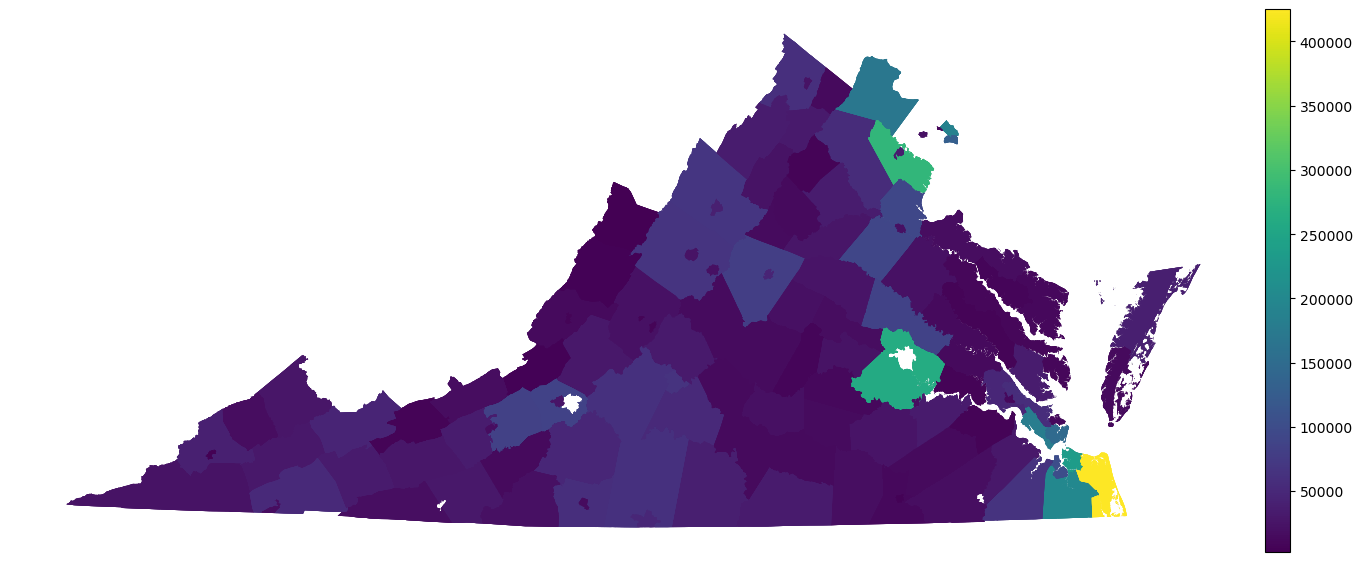

In [70]:
# for 2000 data
df2000 = df[df['year'] == 2000]
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df2000.plot(ax=ax,column='AV0AA',legend=True,cax=cax)

### Education

To best represent the education levels of each county in one metric, we can do a weighted average of the three education levels in the state, where the higher education level equates to a higher weight. Additionally, we'll add a metric that calculates the percent of the population who achieved higher education (4+ years of college).

In [71]:
df['Education_Index'] = (df['B69AA'] * 1 + df['B69AB'] * 2 + df['B69AC'] * 3) / (df['B69AA'] + df['B69AB'] + df['B69AC'])
df['Pct_High_Ed'] = df['B69AC'] / (df['B69AA'] + df['B69AB'] + df['B69AC']) * 100

<Axes: >

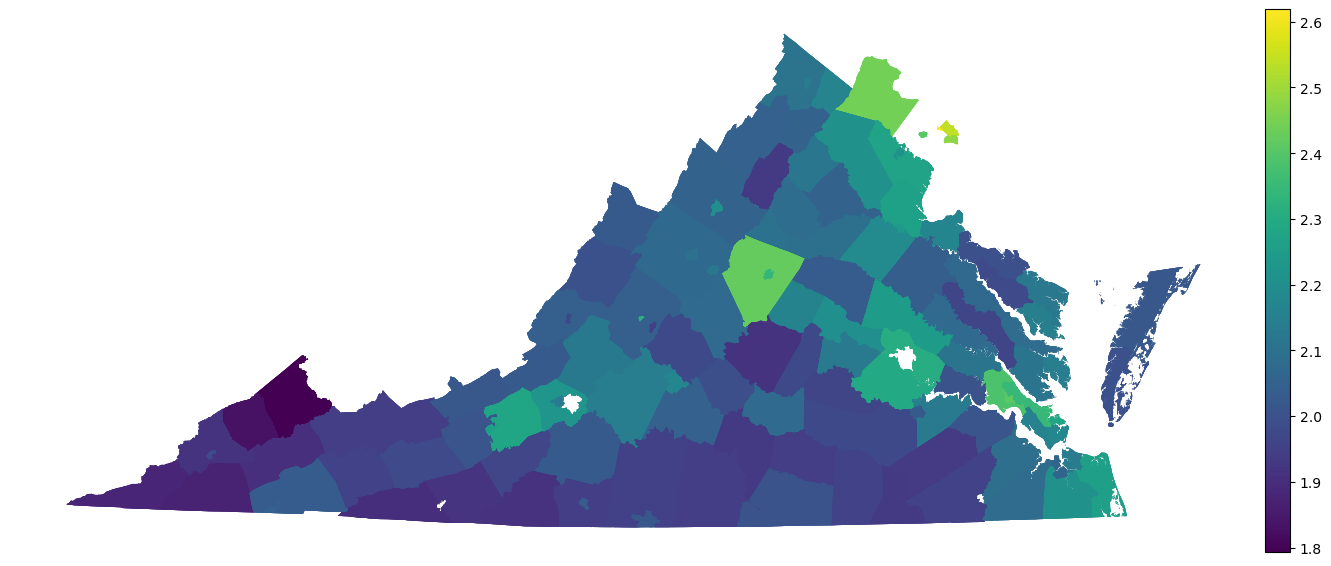

In [72]:
# Data for 2000
df2000Ed = df[df['year'] == 2000]
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df2000Ed.plot(ax=ax,column='Education_Index',legend=True,cax=cax)

<Axes: >

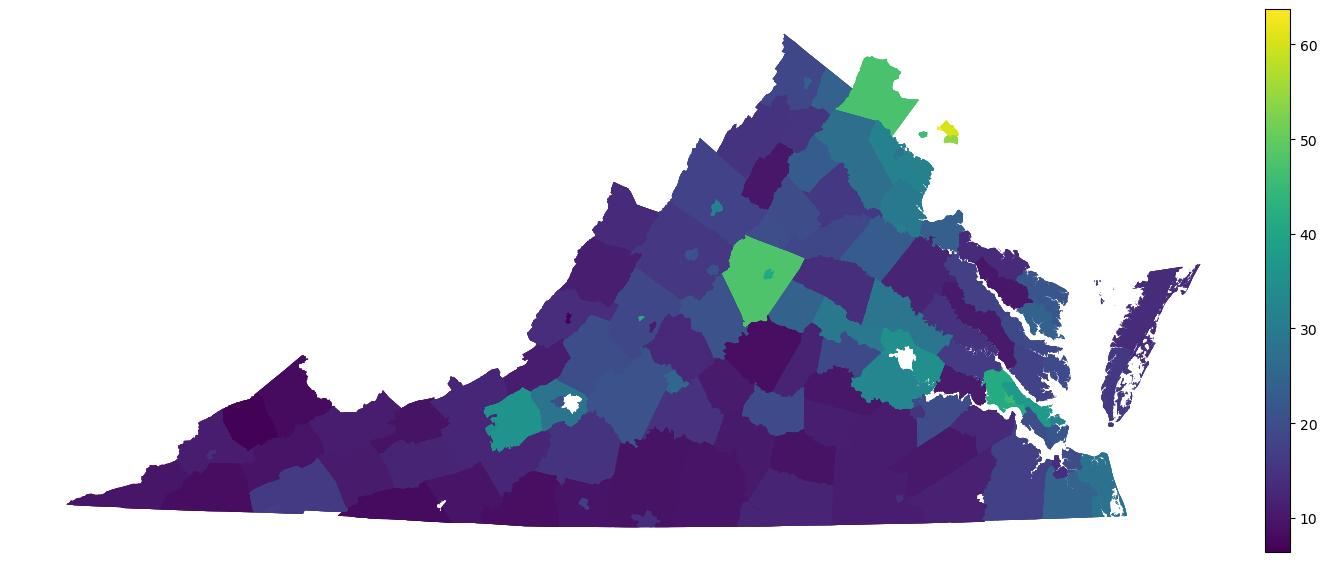

In [73]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df2000Ed.plot(ax=ax,column='Pct_High_Ed',legend=True,cax=cax)

> Let's get the voting data for 2000

In [74]:
def add_voting_data_for_year(year):
  global df
  dfvotes = vdf.loc[ vdf['year']==year,:]

  Dvotes = dfvotes.loc[(dfvotes['party']=='DEMOCRAT'),:].groupby('county_fips')['candidatevotes'].sum()
  Dvotes = Dvotes.rename(f'dem_votes_{year}')
  df = df.merge(Dvotes,left_on='FIPS_left',right_on='county_fips') #df1.merge(df2, left_on='lkey', right_on='rkey

  Rvotes = dfvotes.loc[(dfvotes['party']=='REPUBLICAN'),:].groupby('county_fips')['candidatevotes'].sum()
  Rvotes = Rvotes.rename(f'rep_votes_{year}')
  df = df.merge(Rvotes,left_on='FIPS_left',right_on='county_fips')

  df[f'vote_diff_{year}'] = df[f'rep_votes_{year}']-df[f'dem_votes_{year}']
  df[f'vote_diff_ihs_{year}'] = np.arcsinh(df[f'vote_diff_{year}'])

In [75]:
add_voting_data_for_year(2000)

<Axes: >

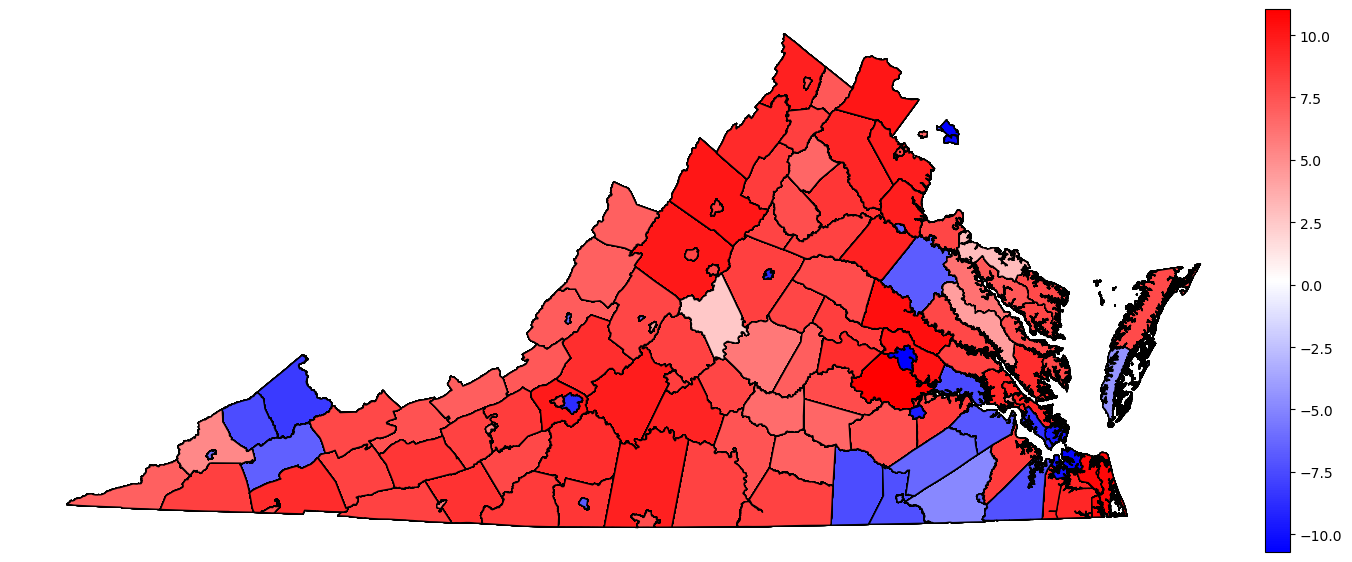

In [81]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='vote_diff_ihs_2000',legend=True,cax=cax,cmap='bwr',edgecolor='k')

For 2004

<Axes: >

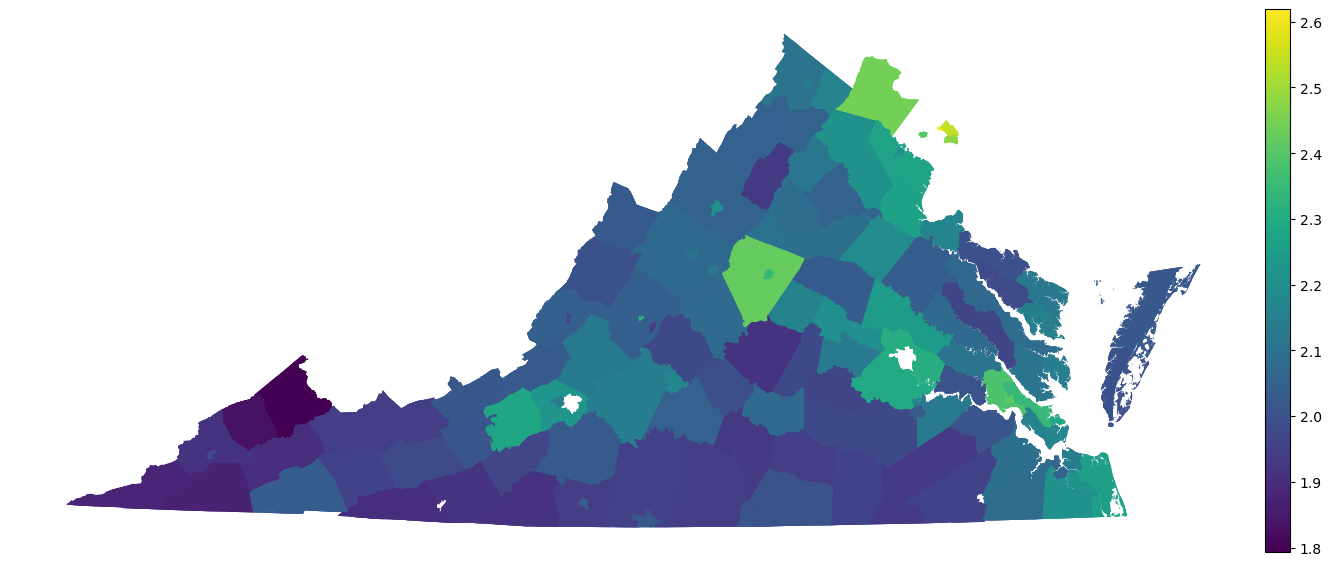

In [90]:
df2004Ed = df[df['year'] == 2004]
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df2004Ed.plot(ax=ax,column='Education_Index',legend=True,cax=cax)

In [88]:
add_voting_data_for_year(2004)

<Axes: >

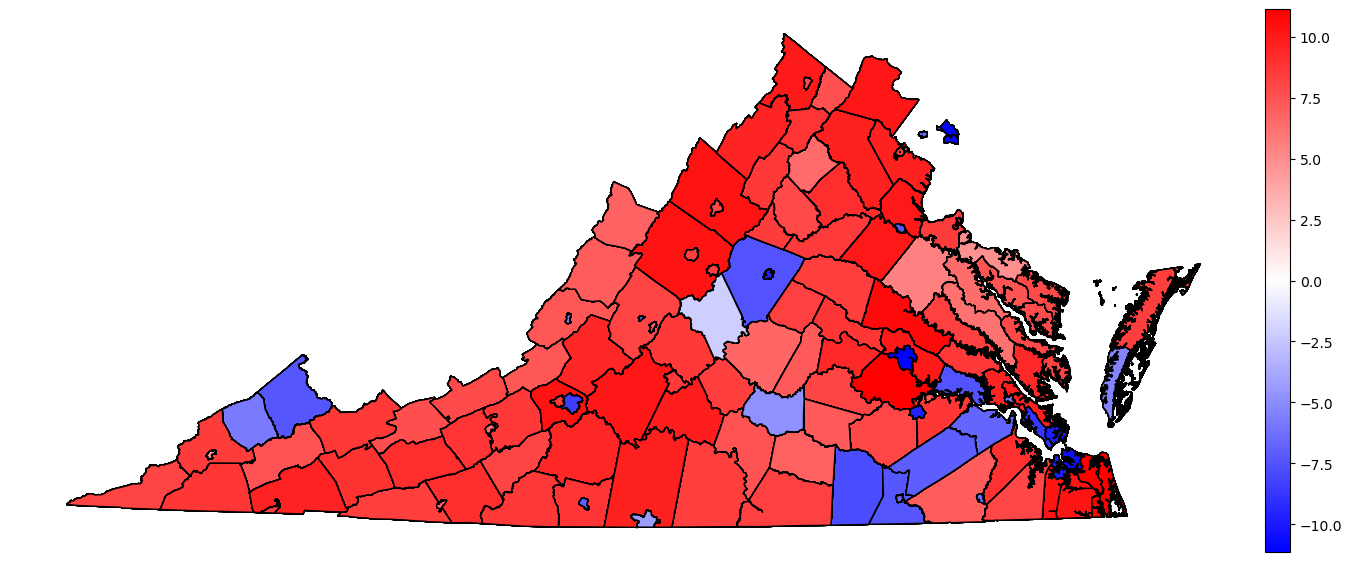

In [84]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='vote_diff_ihs_2004',legend=True,cax=cax,cmap='bwr',edgecolor='k')

For 2008

<Axes: >

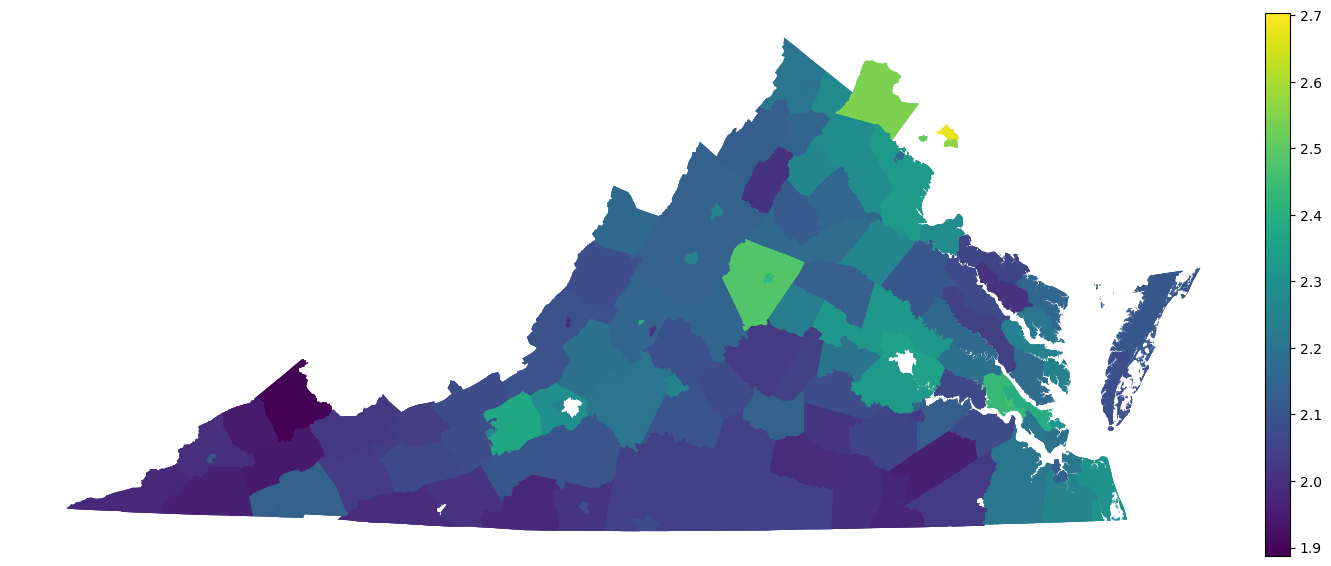

In [91]:
df2008Ed = df[df['year'] == 2008]
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df2008Ed.plot(ax=ax,column='Education_Index',legend=True,cax=cax)

In [92]:
add_voting_data_for_year(2008)

<Axes: >

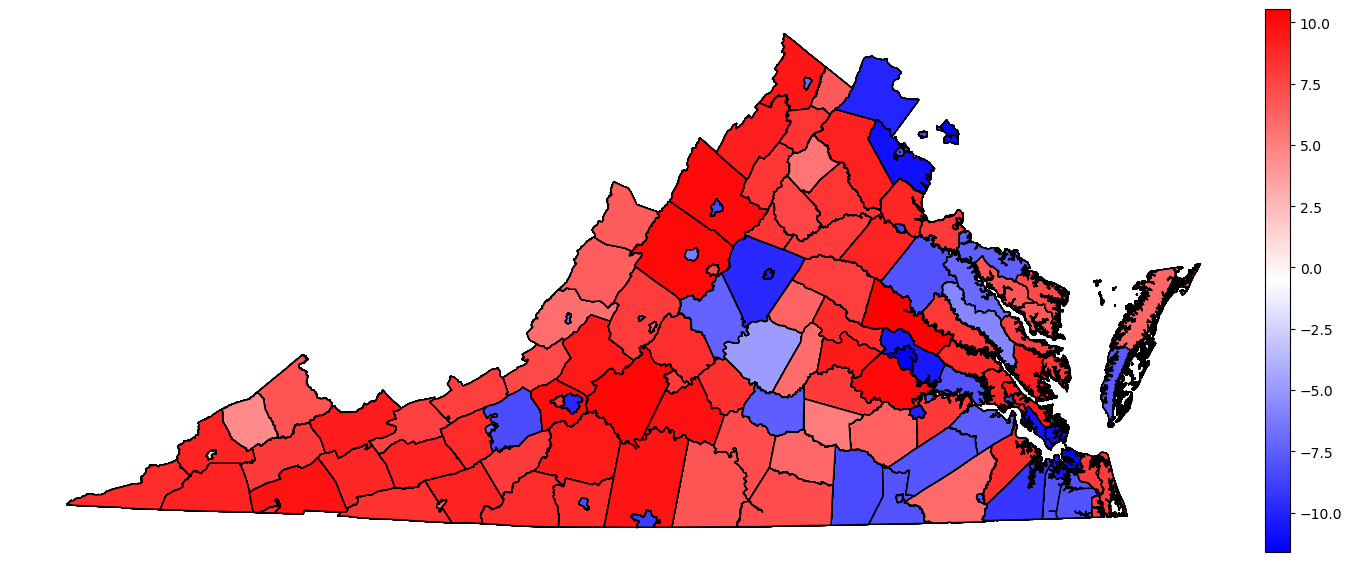

In [93]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='vote_diff_ihs_2008',legend=True,cax=cax,cmap='bwr',edgecolor='k')

For 2012

<Axes: >

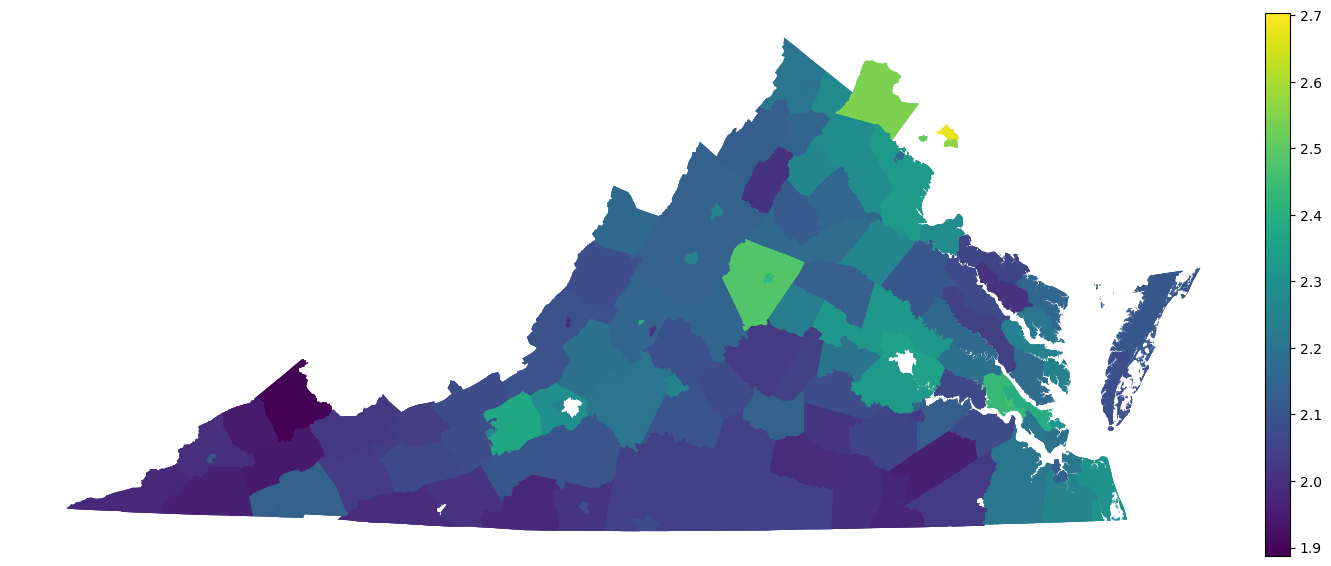

In [94]:
df2012Ed = df[df['year'] == 2012]
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df2012Ed.plot(ax=ax,column='Education_Index',legend=True,cax=cax)

In [95]:
add_voting_data_for_year(2012)

<Axes: >

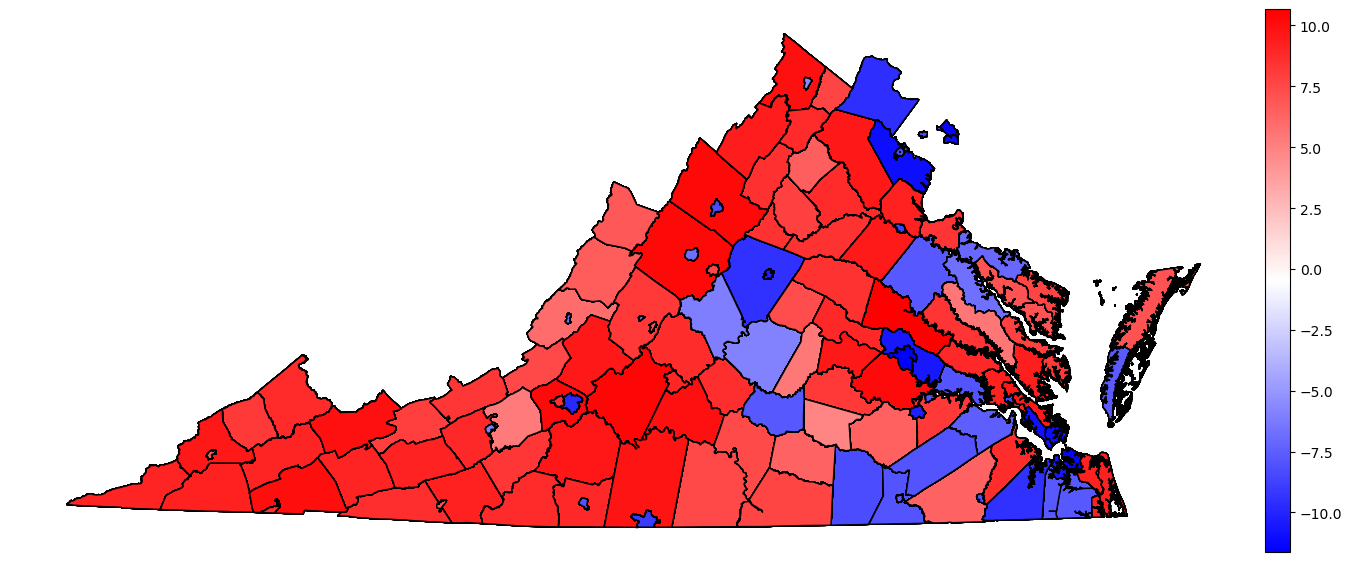

In [96]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='vote_diff_ihs_2012',legend=True,cax=cax,cmap='bwr',edgecolor='k')

For 2016

<Axes: >

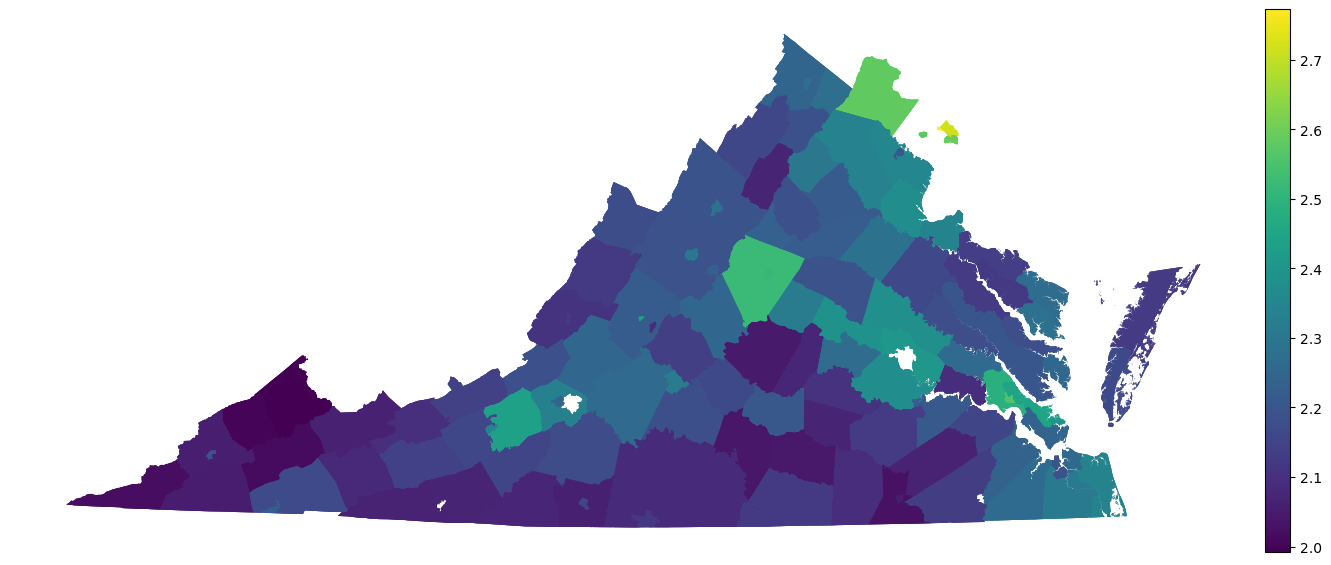

In [97]:
df2016Ed = df[df['year'] == 2016]
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df2016Ed.plot(ax=ax,column='Education_Index',legend=True,cax=cax)

In [98]:
add_voting_data_for_year(2016)

<Axes: >

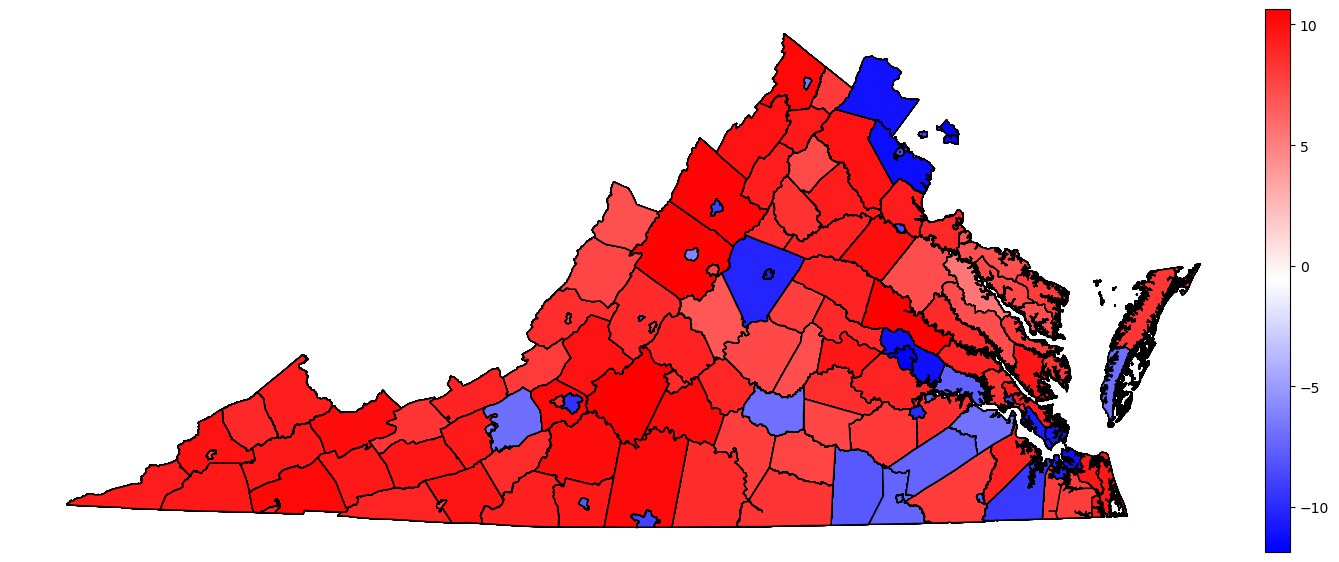

In [99]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='vote_diff_ihs_2016',legend=True,cax=cax,cmap='bwr',edgecolor='k')

For 2020

<Axes: >

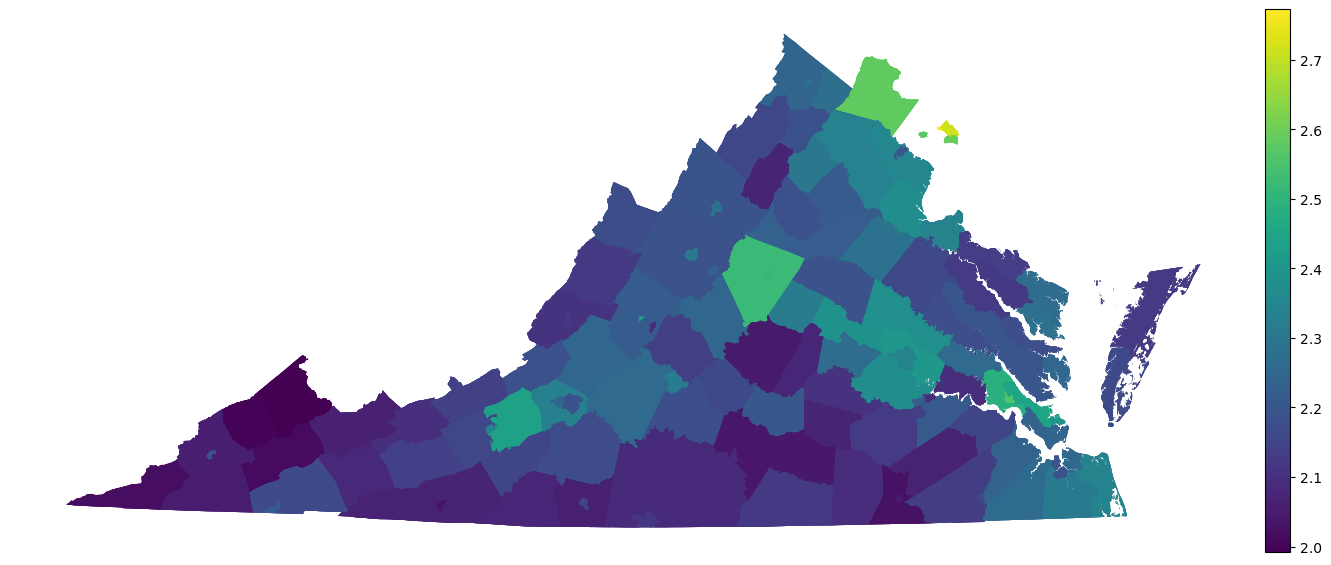

In [100]:
df2020Ed = df[df['year'] == 2020]
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df2020Ed.plot(ax=ax,column='Education_Index',legend=True,cax=cax)

In [101]:
add_voting_data_for_year(2020)

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='vote_diff_ihs_2020',legend=True,cax=cax,cmap='bwr',edgecolor='k')

# Demographic Data

In [9]:
merged  = pd.read_csv('properly_merged_data.csv')
merged.head(20)

,year,county_name,county_fips,candidate,party,candidatevotes,totalvotes,district,N1,N2,...,A88AD,A88AE,AB2AA,BD5AA,AX6AA,CL6AA,AX7AA,AX7AB,BV8AA,BV8AB
0,2000,ACCOMACK,51001,AL GORE,DEMOCRAT,5092,11925,2,NORTHUMBERLAND,LANCASTER,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
1,2000,ACCOMACK,51001,GEORGE W. BUSH,REPUBLICAN,6352,11925,2,NORTHUMBERLAND,LANCASTER,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
2,2000,ACCOMACK,51001,RALPH NADER,GREEN,220,11925,2,NORTHUMBERLAND,LANCASTER,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
3,2000,ACCOMACK,51001,OTHER,OTHER,261,11925,2,NORTHUMBERLAND,LANCASTER,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
4,2004,ACCOMACK,51001,JOHN KERRY,DEMOCRAT,5518,13356,2,NORTHUMBERLAND,LANCASTER,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
5,2004,ACCOMACK,51001,GEORGE W. BUSH,REPUBLICAN,7726,13356,2,NORTHUMBERLAND,LANCASTER,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
6,2004,ACCOMACK,51001,OTHER,OTHER,112,13356,2,NORTHUMBERLAND,LANCASTER,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
7,2008,ACCOMACK,51001,BARACK OBAMA,DEMOCRAT,7607,15623,2,NORTHUMBERLAND,LANCASTER,...,2649.0,4604.0,50250.0,22909.0,33012.0,6678.0,6678.0,26334.0,1002.0,5147.0
8,2008,ACCOMACK,51001,JOHN MCCAIN,REPUBLICAN,7833,15623,2,NORTHUMBERLAND,LANCASTER,...,2649.0,4604.0,50250.0,22909.0,33012.0,6678.0,6678.0,26334.0,1002.0,5147.0
9,2008,ACCOMACK,51001,OTHER,OTHER,183,15623,2,NORTHUMBERLAND,LANCASTER,...,2649.0,4604.0,50250.0,22909.0,33012.0,6678.0,6678.0,26334.0,1002.0,5147.0


C:\Users\coolc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


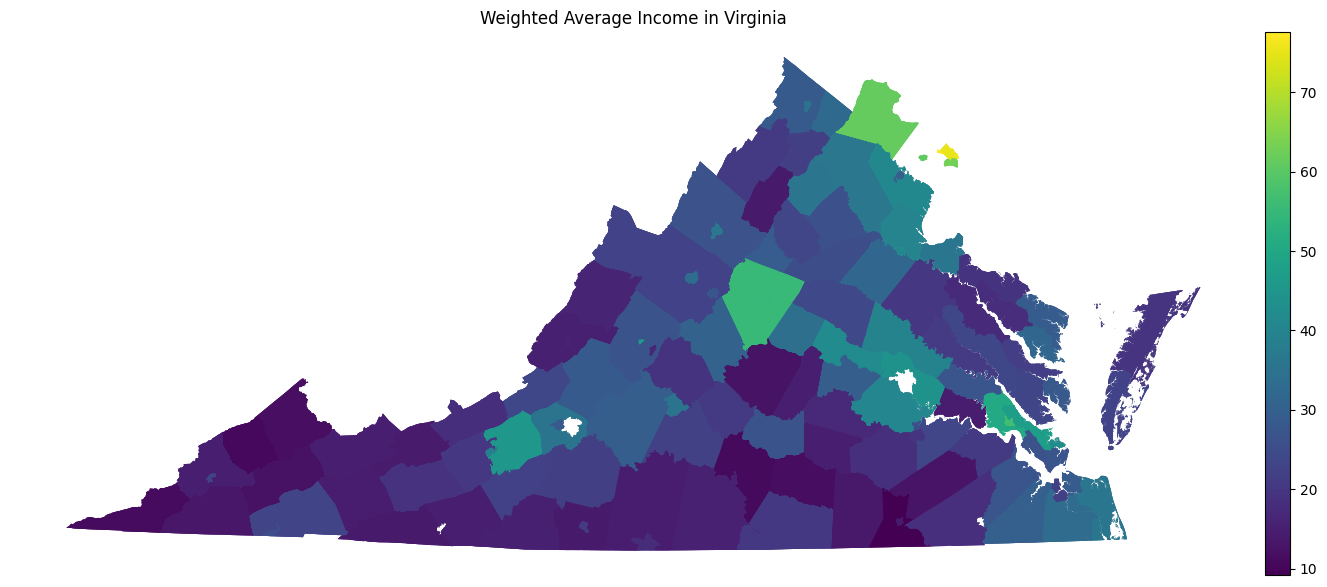

In [28]:
df_year = df[df['year'] == 2016]

# Calculate a representative income metric, e.g., median income per county
# Here we calculate the weighted average assuming A88AE > A88AD > A88AC > A88AB > A88AA
df_year['Weighted_Avg_Income'] = (
    df_year['A88AA'] * 1 + df_year['A88AB'] * 2 + df_year['A88AC'] * 3 +
    df_year['A88AD'] * 4 + df_year['A88AE'] * 5
) / (df_year['A88AA'] + df_year['A88AB'] + df_year['A88AC'] + df_year['A88AD'] + df_year['A88AE'])




fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df_year.plot(ax=ax,column='Pct_High_Ed',legend=True,cax=cax)
ax.set_title(f'Weighted Average Income in Virginia')
ax.axis('off')
plt.show()

C:\Users\coolc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


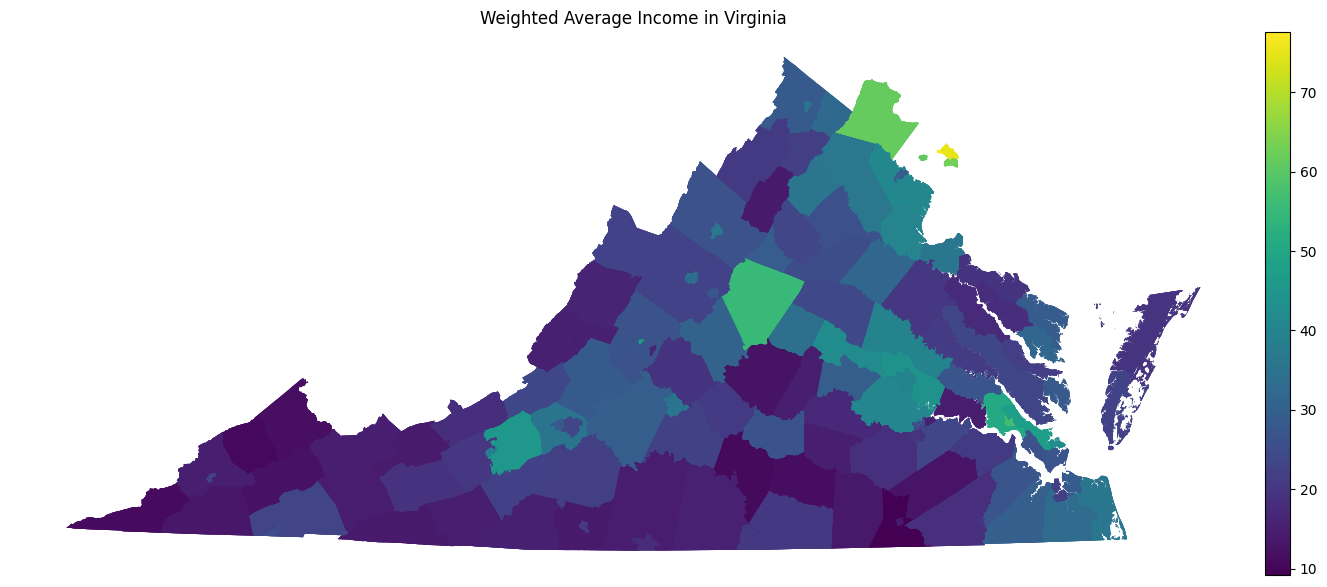

In [29]:
df_year = df[df['year'] == 2020]

# Calculate a representative income metric, e.g., median income per county
# Here we calculate the weighted average assuming A88AE > A88AD > A88AC > A88AB > A88AA
df_year['Weighted_Avg_Income'] = (
    df_year['A88AA'] * 1 + df_year['A88AB'] * 2 + df_year['A88AC'] * 3 +
    df_year['A88AD'] * 4 + df_year['A88AE'] * 5
) / (df_year['A88AA'] + df_year['A88AB'] + df_year['A88AC'] + df_year['A88AD'] + df_year['A88AE'])




fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df_year.plot(ax=ax,column='Pct_High_Ed',legend=True,cax=cax)
ax.set_title(f'Weighted Average Income in Virginia')
ax.axis('off')
plt.show()